PROJECT - BANKTRANSACTIONS 

This project presents data of bank customers and their transactions based on their customerID, TransactionID and CustGender. 
This project invloves interepretation of the dataset.

![image](https://i.imgur.com/frgEzKE.jpeg)

ABOUT THE DATASET

TransactionID - the unique IDs of the transactions of each customer

CustomerID - denotes the individual ID of a customer

CutomerDOB - shows the date of birth of the customers

CustGender - specifies the gender of the customer

CurrentAccountBalance - describes the balance of amount of a customer's current account

TransactionAmount(INR) - Shows the amount of Transaction done by a customer

TransactionDate- the date of transaction

TransactionTime - The time of Transaction



In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('bank_transactions.csv')

DATA ANALYSIS

Data analysis is a process for obtaining raw data, and subsequently converting it into information useful for decision-making by users. Data is collected and analyzed to answer questions, test hypotheses, or disprove theories.

![image](https://i.imgur.com/Ig69jbF.jpeg)

In [6]:
df.head

<bound method NDFrame.head of         TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                

In [8]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [12]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [14]:
df.shape

(1048567, 9)

In [16]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [18]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198.00,1048567.00,1048567.00
mean,115403.54,157087.53,1574.34
std,846485.38,51261.85,6574.74
min,0.00,0.00,0.00
25%,4721.76,124030.00,161.00
50%,16792.18,164226.00,459.03
75%,57657.36,200010.00,1200.00
max,115035495.10,235959.00,1560034.99


In [20]:
for i in df.columns : 
    print(i)
    print(df[i].value_counts())
    print('-'*40)

TransactionID
TransactionID
T1          1
T699051     1
T699038     1
T699039     1
T699040     1
           ..
T349528     1
T349529     1
T349530     1
T349531     1
T1048567    1
Name: count, Length: 1048567, dtype: int64
----------------------------------------
CustomerID
CustomerID
C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: count, Length: 884265, dtype: int64
----------------------------------------
CustomerDOB
CustomerDOB
1/1/1800    57339
1/1/89        809
1/1/90        784
6/8/91        699
1/1/91        666
            ...  
3/9/60          1
17/11/52        1
11/9/63         1
28/2/47         1
24/10/44        1
Name: count, Length: 17254, dtype: int64
----------------------------------------
CustGender
CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64
----------------------------------------
CustLocation
CustLocation
MUMBAI              

In [21]:
df['CustGender'].value_counts()


CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64

In [24]:
df['CustomerID'].value_counts()

CustomerID
C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: count, Length: 884265, dtype: int64

In [26]:
df.drop((df[df['CustGender']=='T']).index , inplace=True)

In [28]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

/tmp/ipykernel_81/617845747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [30]:
l=df['TransactionDate'].dt.year 
l.value_counts()

TransactionDate
2016    1048566
Name: count, dtype: int64

array([[<Axes: title={'center': 'CustAccountBalance'}>,
        <Axes: title={'center': 'TransactionDate'}>],
       [<Axes: title={'center': 'TransactionTime'}>,
        <Axes: title={'center': 'TransactionAmount (INR)'}>]],
      dtype=object)

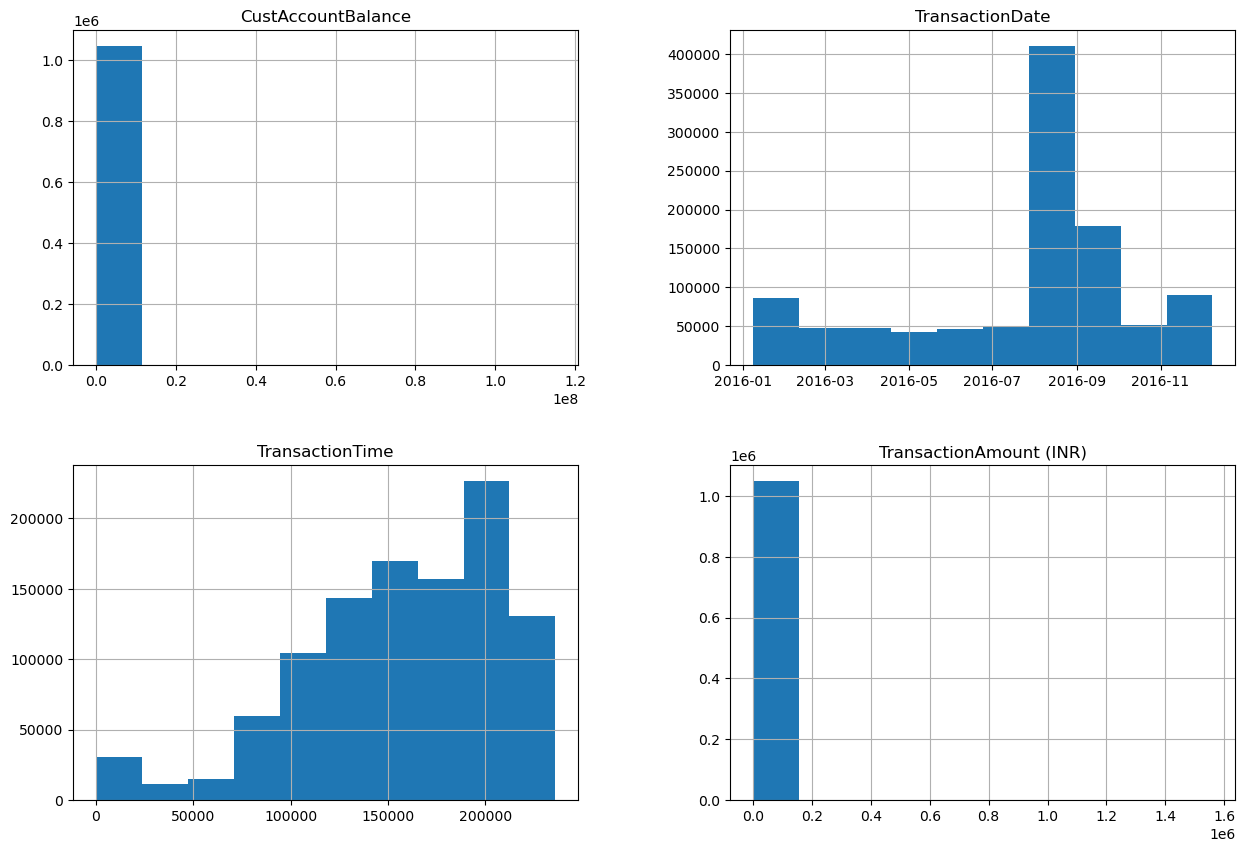

In [32]:
df.hist(figsize=(15,10)) #plotting histogram

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

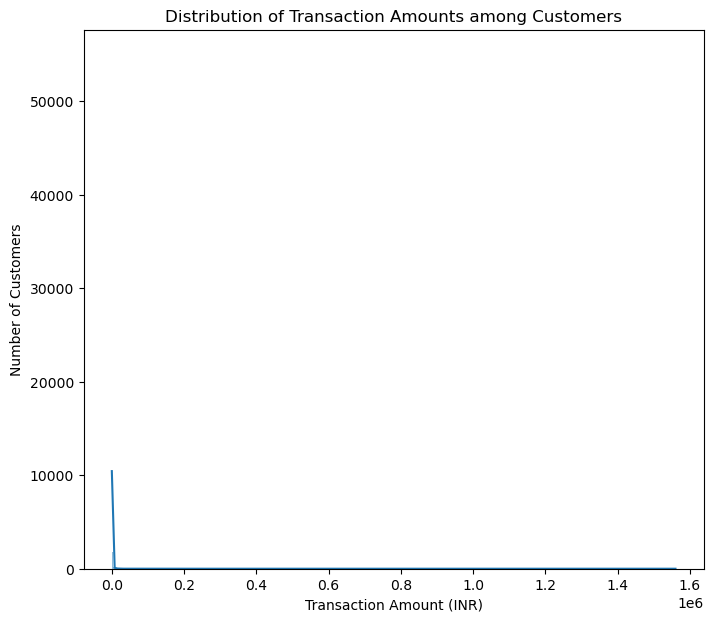

In [36]:
plt.figure(figsize=(8, 7))
sns.histplot(df['TransactionAmount (INR)'], kde=True)
plt.title('Distribution of Transaction Amounts among Customers')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()


In [38]:
df.corr

<bound method DataFrame.corr of         TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0              

RFM ANALYSIS

 RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. 

In [40]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

current_date = df['TransactionDate'].max()
rfm_data = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

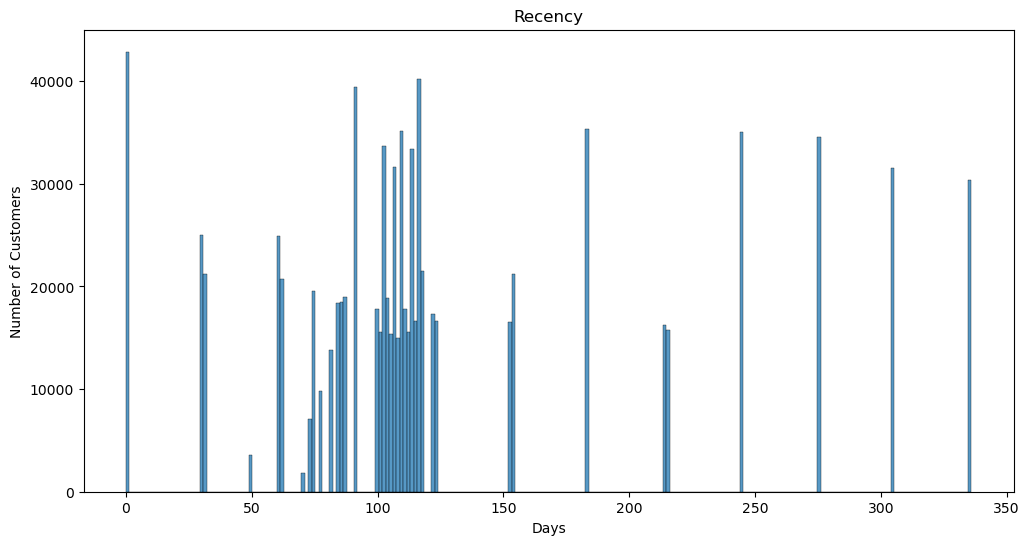

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'])
plt.title('Recency')
plt.xlabel('Days')
plt.ylabel('Number of Customers')
plt.show()

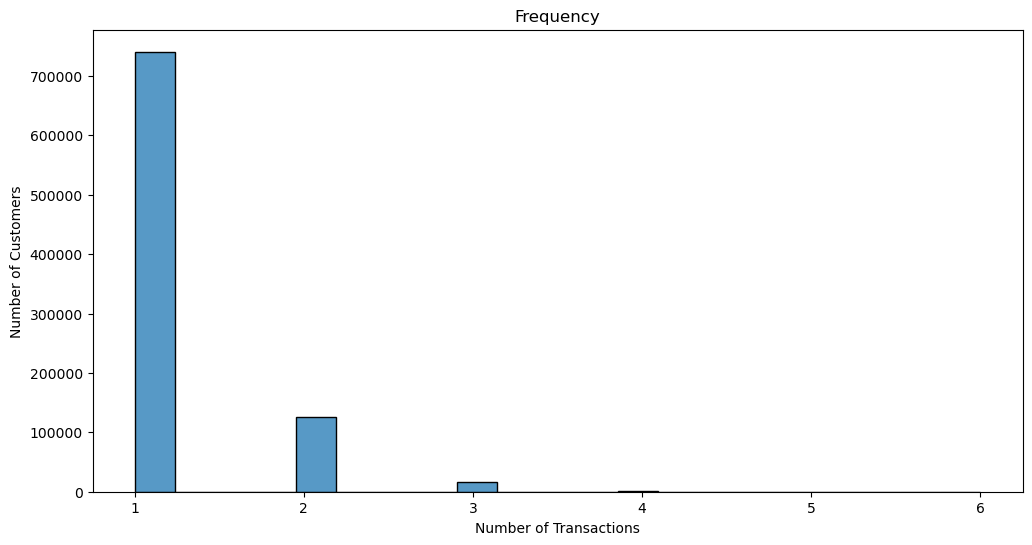

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'])
plt.title('Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

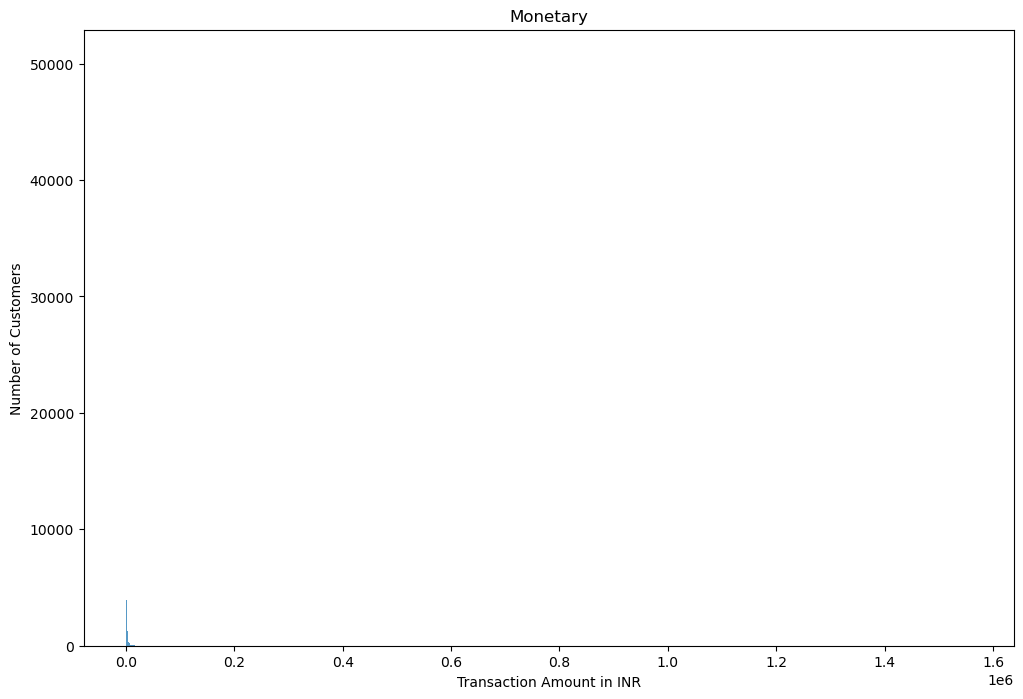

In [44]:
plt.figure(figsize=(12, 8))
sns.histplot(rfm_data['Monetary'])
plt.title('Monetary')
plt.xlabel('Transaction Amount in INR')
plt.ylabel('Number of Customers')
plt.show()


In [46]:
import numpy as np


CLUSTERING
Clustering is a data science technique in machine learning that groups similar rows in a data set. After running a clustering technique.


#cluster analysis

<function matplotlib.pyplot.show(close=None, block=None)>

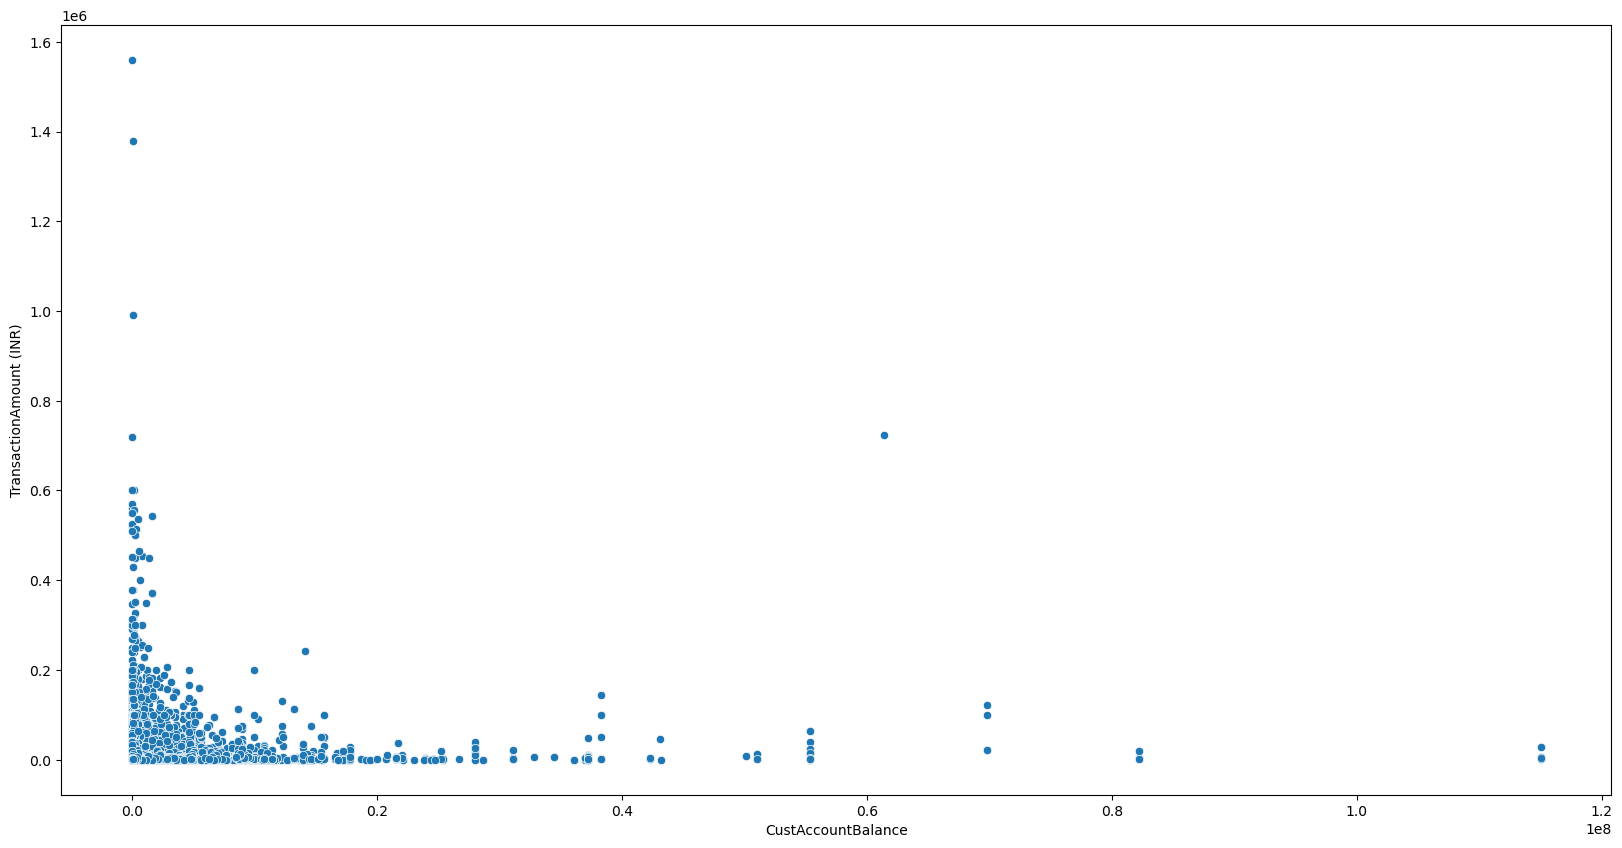

In [48]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df, x ='CustAccountBalance', y = 'TransactionAmount (INR)')
plt.show

In [56]:
df = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])


In [52]:
k = 3

In [58]:
kmeans = KMeans(n_clusters=3)

In [60]:
kmeans.fit(df)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=3)

In [66]:
labels = kmeans.labels_


In [68]:
centers = kmeans.cluster_centers_

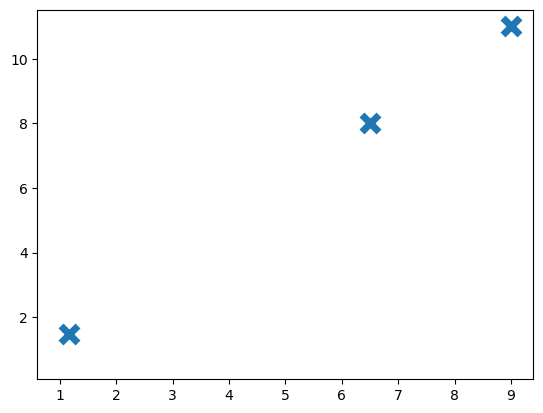

In [70]:
for i in range(len(df)):
    plt.plot(df[i][0], df[i][1], markersize=10)

plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

In [31]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

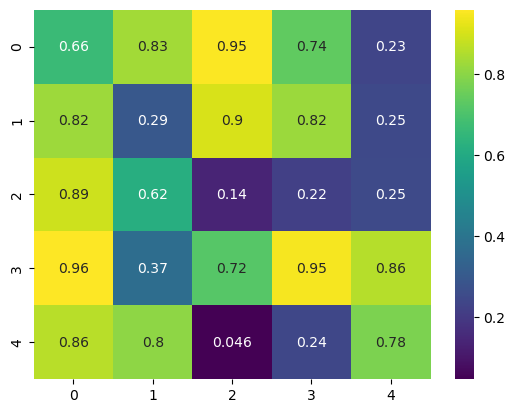

In [130]:
data = np.random.random((5, 5))

# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap='viridis', cbar=True)
plt.show()

#BUILDING MACHINE LEARNING MODEL

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
 iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)

In [106]:
svm_classifier.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [108]:
y_pred = svm_classifier.predict(X_test)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.97


In [40]:
df.shape

(1048566, 9)

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)
y_pred

array([ 1.96342019e-03,  2.02420562e+00,  1.17579475e+00,  1.99268935e+00,
        1.27143104e+00,  1.31364818e+00, -4.98442010e-02,  1.45287177e+00,
        1.98205701e-02, -1.95700015e-01, -7.69934681e-02,  2.19543624e+00,
        1.13210100e+00,  1.13459723e+00,  1.60481206e+00,  1.96832935e+00,
        1.53005852e+00,  1.64210459e+00,  1.84528454e+00,  1.73934204e+00,
        1.84745367e+00,  1.16494868e-01,  1.42447691e+00,  1.89222957e+00,
       -1.15733859e-01,  1.94794218e+00,  1.10757784e+00,  1.70783059e+00,
        1.05728542e+00,  2.04311163e+00])

NUMERICAL

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_pred, y_test))

0.05732219491713385


In [122]:
print(mean_absolute_error(y_pred, y_test))

0.18121047279552774


In [124]:
r2_score(y_pred, y_test)

0.901828627956846

CONCLUSION

The given data has been processed under the machine learning model and presents us the regression of the data. the customers data is 0.97 times less accurate . the correlation between all the features has been represented in the heatmap. 
data analysis has been performed
the RFM analysis has also been performed to check the receny frequency and monetry value like the receny is more around 100-150 days. 

clustering has been done on the data.
A machine learning model has been build with the help pf the data and the prediction has also been generated under the test.
